# 6.1 ConvNet: MNIST image classifier (digits)

In [27]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/assignment06


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from keras import layers, models
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical

Load the Data

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
# get the size of the data sets
print(f'train_images: {train_images.shape}')
print(f'test_images: {test_images.shape}')
print(f'train_labels: {train_labels.shape}')
print(f'test_labels: {test_labels.shape}')

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
train_labels: (60000,)
test_labels: (10000,)


Text(0.5, 1.0, '5')

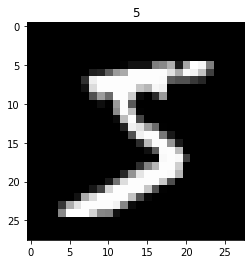

In [31]:
plt.imshow(train_images[0], cmap = 'gray')
plt.title(train_labels[0])

In [32]:
# reshape datasets
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [33]:
# normalize datasets
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [34]:
# convert labels to numeric
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

Split training into training and validatation datasets

In [35]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

Build the Model

In [36]:
# Instantiate a convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [37]:
# Add a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

Compile the Model

In [38]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Train the model

In [39]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 5, batch_size = 64,
                    validation_data = (x_val, y_val))

Epoch 1/5
782/782 [==============================] - 58s 73ms/step - loss: 0.2125 - accuracy: 0.9321 - val_loss: 0.0892 - val_accuracy: 0.9743
Epoch 2/5
782/782 [==============================] - 54s 69ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 3/5
782/782 [==============================] - 57s 73ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0425 - val_accuracy: 0.9885
Epoch 4/5
782/782 [==============================] - 55s 71ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 5/5
782/782 [==============================] - 55s 70ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0422 - val_accuracy: 0.9866


Train History

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot Training and Validation Loss

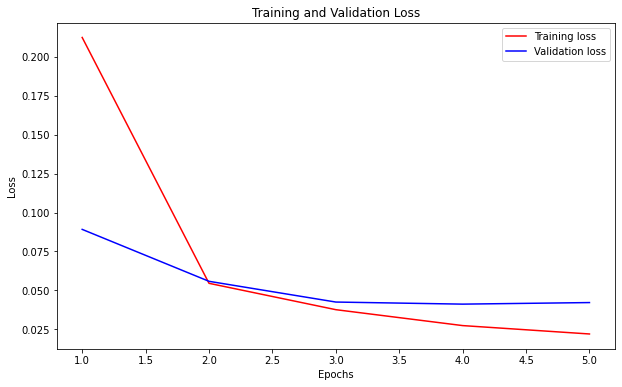

In [41]:
plt.figure(figsize = (10, 6))

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

fig = plt.gcf()
fig.savefig('results/mnist/train_val_loss.png')

plt.show()

Plot Validation and Training Accuracy

<Figure size 432x288 with 0 Axes>

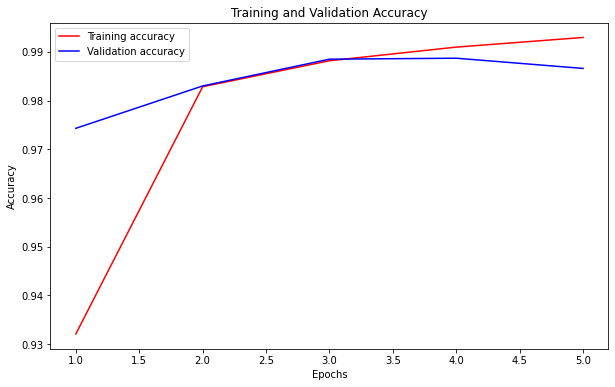

In [42]:
plt.clf()

plt.figure(figsize = (10, 6))

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

fig = plt.gcf()
fig.savefig('results/mnist/train_val_accuracy.png')

plt.show()

Evaluate the model

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.0308 - accuracy: 0.9909


In [44]:
print(f'Test accurancy: {test_acc * 100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

Test accurancy: 99.1%
Test loss: 0.031


Save Model and results

In [45]:
model.save('results/mnist/mnist.h5', history)

In [46]:
pickle.dump({'test_accuracy': test_acc, 
            'test_loss': test_loss, 
            'history_dict': history_dict},
            open("results/mnist/training_metrics", "wb"))